# Regression Trees

## Setup

In [13]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [14]:
# Importing necessary libraries
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Accessing the Data

In [15]:
# Set path to the dataset
path = '..\_program resources\yellow_tripdata.csv'

# Assign the path to a dataframe 
df = pd.read_csv(path)

# Display the head and tail of the dataframe
df

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


<Axes: >

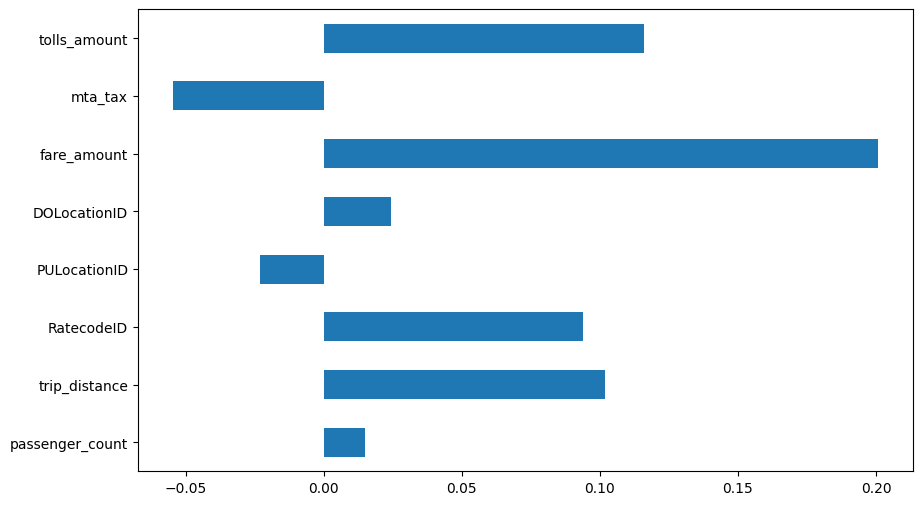

In [29]:
# Using tip_amount as the target variable and assessing correltion
correlation_values = df.corr()['tip_amount'].drop('tip_amount')
# Plotting the correlation values to identify the most and least correlated features
correlation_values.plot(kind='barh',figsize=(10,6))


## Dataset Preprocessing

In [18]:
# Extract the labels from the dataframe
# Why astype('float32')?
# The float32 type is used to save memory and speed up the training process.
y = df['tip_amount'].values.astype('float32')

# Drop the target variable from the feature matrix
proc_data = df.drop(['tip_amount'], axis=1)

# Get the feature matrix used for training
X = proc_data.values

# Normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)
# Normalize the target variable X
# Set axis=1 to normalize each row independently
# Set norm to 'l1' to use L1 normalization (sum of absolute values = 1)
# What is l1 normalization?
# L1 normalization scales the values in each row so that their absolute sum equals 1.
# This is useful for ensuring that the features are on a similar scale.
# Set copy=False to modify the original array in place

## Dataset Training/Test Split

In [19]:
# Split the data into training and testing sets using a 30% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Building the Decision Tree Regressor model with Scikit-Learn

In [20]:
# Note important parameters for the model
# Criterion: squared_error
# Why squared_error?
# The squared_error criterion is used to minimize the mean squared error (MSE) between the predicted and actual values.
# This is a common choice for regression tasks because it penalizes larger errors more heavily than smaller ones.
# Max_depth:8 
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_regressor = DecisionTreeRegressor(
    criterion='squared_error', 
    max_depth=8, 
    random_state=42
    )

In [21]:
# fit the model to the training data
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

## Evaluation Scikit-Learn and Snap ML Decision Tree Regressor Models

In [22]:
# Evaluate the model with the score method of DecisionTreeRegressor
# r2 value indiciates the coefficient of determination
# What is the coefficient of determination?
# The coefficient of determination (R²) is a statistical measure that indicates how well the independent variables explain the variability of the dependent variable.
# It ranges from 0 to 1, where 1 indicates perfect prediction and 0 indicates no predictive power.

# Run inference using the sklearn model
y_pred = dt_regressor.predict(X_test)

# Evaluate the model using mean squared error (MSE)
# MSE is a common metric for regression tasks that measures the average squared difference between predicted and actual values.
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score: {0:.3f}'.format(mse_score)) # format the output to 3 decimal places

r2_score = dt_regressor.score(X_test, y_test)
print('R² score: {0:.3f}'.format(r2_score)) # format the output to 3 decimal places

MSE score: 24.562
R² score: 0.028


## What if we change max_depth from 8 to 12?

In [25]:
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_regressor = DecisionTreeRegressor(
    criterion='squared_error', 
    max_depth=12, 
    random_state=42
    )
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score: {0:.3f}'.format(mse_score))
# With max_depth set to 12, the MSE Score increased

r2_score = dt_regressor.score(X_test, y_test)
print('R² score: {0:.3f}'.format(r2_score))
# With max_depth set to 12, the R2 Score decreased

MSE score: 26.517
R² score: -0.050


## What features have the most effect on the tip amount?

I observe fare_amount, toll_amount, and trip_distance to have the greatest effect on tip_amount

In [ ]:
# Reuse the .corr() method and save to a variable
correlation_values = df.corr()['tip_amount'].drop('tip_amount')

# Post the top three values from the .corr() method variable
abs(correlation_values).sort_values(ascending=False)[:3]

fare_amount      0.200638
tolls_amount     0.116172
trip_distance    0.101819
Name: tip_amount, dtype: float64

## What if we remove the 4 non-correlated features from the input set? How does it affect the MSE and R2 scores?

In [27]:
df = df.drop(['payment_type', 'VendorID', 'store_and_fwd_flag', 'improvement_surcharge'], axis=1)
# Get the feature matrix used for training
X = df.values

# Normalize the feature matrix
X = normalize(X, axis=1, norm='l1', copy=False)

from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_regressor = DecisionTreeRegressor(
    criterion='squared_error', 
    max_depth=8, 
    random_state=42
    )
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score: {0:.3f}'.format(mse_score))
# With max_depth set to 12, the MSE Score increased

r2_score = dt_regressor.score(X_test, y_test)
print('R² score: {0:.3f}'.format(r2_score))
# With max_depth set to 12, the R2 Score decreased

MSE score: 24.562
R² score: 0.028


After removing the non-correlated input data, I observe that there is no discernible change in the MSE and R2 Scores.

## What if we change Max Depth from 8 to 4? What happens to the MSE and R2 scores?

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# for reproducible output across multiple function calls, set random_state to a given integer value
dt_regressor = DecisionTreeRegressor(
    criterion='squared_error', 
    max_depth=4, 
    random_state=42
    )
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
mse_score = mean_squared_error(y_test, y_pred)
print('MSE score: {0:.3f}'.format(mse_score))
# With max_depth set to 4, the MSE Score decreased
# A lower MSE score is better.

r2_score = dt_regressor.score(X_test, y_test)
print('R² score: {0:.3f}'.format(r2_score))
# With max_depth set to 4, the R2 Score increased
# A higher R2 score is good?

MSE score: 24.410
R² score: 0.034


I observe that there is a very slight decrease in the MSE Score and very slight increase in the R2 score, which seems to be a good thing. Lower MSE score = good, higher r2 score = good.